# Hénon–Heiles system 
>  Hénon–Heiles system 的哈密顿量表现形式：
        $\Large \quad\\ \large H=\frac{\LARGE p_x^{2}+p_y^{2}}{\LARGE 2}+\frac{\LARGE x^2+y^2}{\LARGE 2}+\lambda (x^2 y-\frac{y^3}{3})$ 
        
   由上式的哈密顿量可以求得以下动力学方程组：$$ \left\{
\begin{array}{ll}
\dot{x}=\frac{\partial{H}}{\partial{p_x}}=p_x\\
\dot{y}=\frac{\partial{H}}{\partial{p_y}}=p_y\\
\dot{p_x}=-\frac{\partial{H}}{\partial{x}}=-x-2\lambda xy\\
\dot{p_y}=-\frac{\partial{H}}{\partial{y}}=-y-\lambda (x^2-y^2)
\end{array}
\right.
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 此处取λ=1，m=1

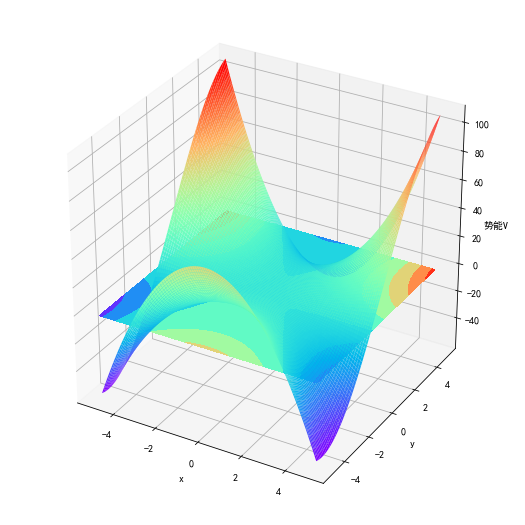

In [7]:
def V(x, y):
    return (x**2+y**2)/2+x**2*y-y**3/3


def T(px, py): aA


return px**2/2+py**2/2


fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)

x = np.arange(-5, 5, 0.02)
y = np.arange(-5, 5, 0.02)
x, y = np.meshgrid(x, y)  # 编制网络
z = V(x, y)
ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=plt.get_cmap('rainbow'))
ax.contourf(x, y, z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
ax.set_xlabel('x ')
ax.set_ylabel('y ')
ax.set_zlabel('势能V')
plt.show()

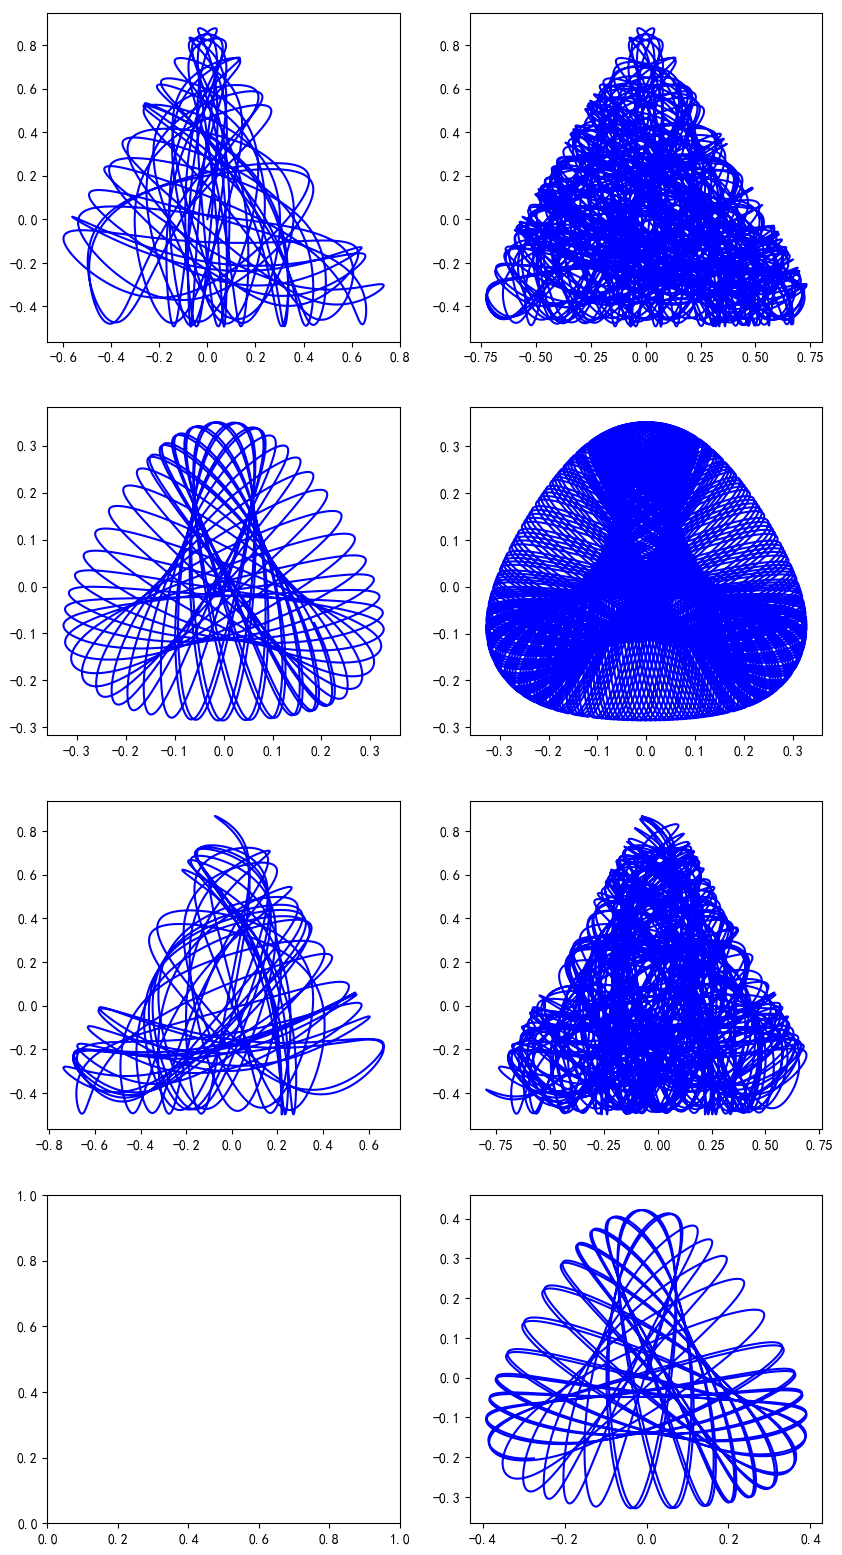

In [10]:
def H(state, t, _lambda):
    x, y, px, py = state
    return np.array([px, py, -x-2*_lambda*x*y, -y-_lambda*(x**2-y**2)])


t0 = np.arange(0, 200, 0.01)
t1 = np.arange(0, 800, 0.01)
track00 = odeint(H, (0, 0, 0.1, 0.56), t0, args=(1,))  # 初始能量略小于1/6但与之十分接近
track01 = odeint(H, (0, 0, 0.1, 0.56), t1, args=(1,))
track10 = odeint(H, (0, 0, 0.1, 0.3), t0, args=(1,))  # 初始能量小于1/6
track11 = odeint(H, (0, 0, 0.1, 0.3), t1, args=(1,))
track20 = odeint(H, (0, 0, 0.1, 0.568), t0, args=(1,))  # 初始能量略大于1/6但与之十分接近
track21 = odeint(H, (0, 0, 0.1, 0.568), t1, args=(1,))
track31 = odeint(H, (0, 0, 0.1, 0.3559026), t0, args=(1,))
fig, ax = plt.subplots(4, 2, figsize=(10, 20), dpi=100)
ax[0][0].plot(track00[:, 0], track00[:, 1], 'b')
ax[0][1].plot(track01[:, 0], track01[:, 1], 'b')
ax[1][0].plot(track10[:, 0], track10[:, 1], 'b')
ax[1][1].plot(track11[:, 0], track11[:, 1], 'b')
ax[2][0].plot(track20[:, 0], track20[:, 1], 'b')
ax[2][1].plot(track21[:, 0], track21[:, 1], 'b')
ax[3][1].plot(track31[:, 0], track31[:, 1], 'b')

## 对图6作$p_x$=0的庞加莱截面

Text(0.5,1,'x-y')

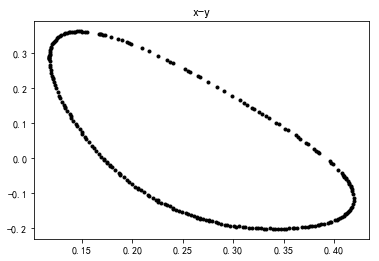

In [4]:
x0 = []
y0 = []
PX = track31[:, 2]
X = track31[:, 0]
Y = track31[:, 1]
PY = track31[:, 3]
for i in np.arange(0, len(X)):
    if (np.abs(PX[i]) < 0.001) & (PY[i] > 0):
        x0.append(X[i])
        y0.append(Y[i])
plt.plot(x0, y0, 'k.')
plt.title('x-y')

Text(0.5,1,'y-py')

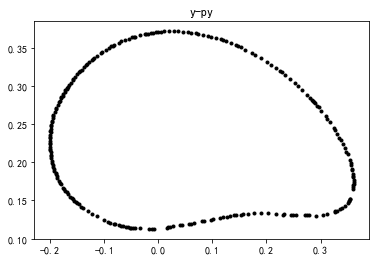

In [10]:
x0 = []
py0 = []

for i in np.arange(0, len(X)):
    if (np.abs(PX[i]) < 0.001) & (PY[i] > 0):
        x0.append(X[i])
        py0.append(PY[i])
plt.plot(y0, py0, 'k.')
plt.title('y-py')

### 以$p_x$为积分变量作精确积分(λ取1)   
$ \left\{
\begin{array}{ll}
\frac{\partial{x}}{\partial{p_x}}=\frac{p_x}{-x-2xy}\\
\frac{\partial{y}}{\partial{p_x}}=\frac{p_y}{-x-2xy}\\
\frac{\partial{p_y}}{\partial{p_x}}=\frac{y+x^2-y^2}{x+2xy}
\end{array}
\right.
$

In [40]:
def H2(w2, px):
    x, y, py = w2
    return np.array([px/(-x-2*x*y), py/(-x-2*x*y), (y+x*x-y*y)/(x+2*x*y)])


x02 = []
y02 = []
py02 = []

PX = track31[:, 2]
X = track31[:, 0]
Y = track31[:, 1]
PY = track31[:, 3]
for i in np.arange(0, len(X)-1):
    if (PX[i] < 0) & (PX[i+1] > 0):
        px0 = np.arange(0, PX[i], PX[i]/100)
        track = odeint(H2, (X[i], Y[i], PY[i]), px0)
        x02.append(track[99, 0])
        y02.append(track[99, 1])
        py02.append(track[99, 2])

Text(0.5,1,'y-py')

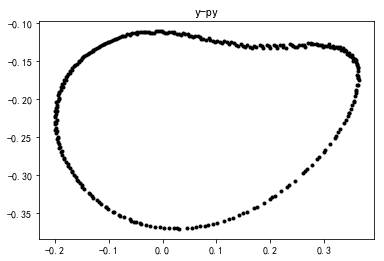

In [41]:
plt.plot(y02, py02, 'k.')
plt.title('y-py')

Text(0.5,1,'x-y')

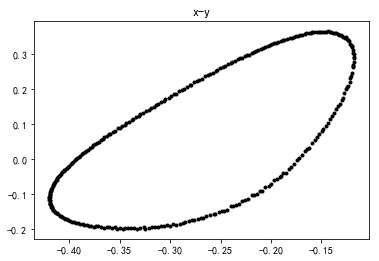

In [42]:
plt.plot(x02, y02, 'k.')
plt.title('x-y')